# Iver Småge
## General Sinusoidal Wave Simulator in 1D and in 2D
### TFY4170-Exercise2-2022-V1

#### Wave Physics 

<section class="post-meta">
By Pawel Sikorski, Department of Physics, NTNU
</section>
Last edited: January 18th 2022




The code below contains one possible implementation of a situation where a single source with a time dependent amplitude generates two waves moving in +x and -x direction. Using this code or the code you have developed in Exercise 1 and:


- Extend to two sources located at $x=0$ with frequency $\omega_1$ and $\omega_2$.  

- Extend to two sources one located at $x=0$ and one at $x=\Delta x$ operating at the same frequency and with a constant and equal amplitudes. First, set $\Delta x = 4\lambda$;

- investigate the effect of $\Delta x$ on the interference pattern in different regions along the x-axis. What happens in a situation where the sources have different amplitudes? 

- Make a 2D simulation for a single and multiple sources, for which both angular frequency and time-dependent amplitude can be set.  In this case $$y(r,t) = A\sin(\omega t - kr + \phi)$$ and all points that are at the distance $r$  from the source oscilate in phase. 

Help with implementation of 2D animations:  https://matplotlib.org/stable/gallery/animation/dynamic_image.html



## Answers

Collection of animations: https://imgur.com/a/nRdwtUi  
For 2d waves https://imgur.com/a/WDw1uF4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter, ArtistAnimation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Enable interactive plot
%matplotlib inline

from IPython.display import HTML
FPS=30

2D matrix that contains data as a function of x and is calculated for each timepoint t. 

In [2]:
MINX = -10
MAXX = 10 # [m]

x = np.linspace(MINX, MAXX, 500)

global omega1,omega2,v

#system parameters
omega1=3*np.pi  
omega2=1.5*np.pi  
v = 1 #m/s


In [3]:
# Time-dependent surce amplitude
def A(t0):
     Amplitude=np.ones(t0.shape)*(1*t0/10)
     Amplitude=abs(np.ones(t0.shape)*np.cos(0.1*np.pi*t0))
     #Amplitude*=(Amplitude>0) 
     return Amplitude


Disturbance at along the x-axis at time t0
amplitude at (x,t) is calculated from the source amplitude at (0, t -x/v)
where x/v is the time that wave needs to travel to point x

Abs(x) is needed due to the fact that the wave propagates in oposite direction for x<0.


In [4]:
def get_Lambda(omega, v):
    T1 = 2*np.pi/omega
    return v*T1

def y(x,t0,phi,omega,v):
    # calculated form given angular frequency and wave propagation velocity
    Lambda = get_Lambda(omega, v)
    k = 2*np.pi/Lambda
    y = A(t0-np.abs(x)/v)*np.sin(omega*t0 - np.abs(k*x) + phi) 
    return y  

In [5]:
# Testing amplitude function

#MINT = 0
#MAXT = 100
#t = np.linspace(MINT, MAXT, 500)
#fig = plt.figure(figsize=(12, 4), dpi=60)
#plt.plot(t,A(t))
#plt.show()



In [6]:


# Set up the figure
fig = plt.figure(figsize=(10, 8), dpi=60)
ax = plt.axes(xlim=(MINX-0.5, MAXX), ylim=(-5.5, 5.5))
ax.set_aspect('equal')
color1 = "#D00000"
line, = ax.plot([], color=color1)
rod, = ax.plot([], [], color=color1, linewidth=4)
ball = plt.Circle((0, 0), .5, fc=color1)
color2 = "#FFBA08"
line2, = ax.plot([], color=color2)
rod2, = ax.plot([], [], color=color2, linewidth=4)
ball2 = plt.Circle((0, 0), .5, fc=color2)
color3 = "#3F88C5"
line3, = ax.plot([], color=color3)

ax.add_patch(ball)
ax.add_patch(ball2)


Interval=50 #Delay between frames in milliseconds 
time_text = ax.text(0.2, .8, '', transform=ax.transAxes)
v_text = ax.text(0.6, .8, '', transform=ax.transAxes)



def animate(frame_num):
    t=frame_num*Interval/1000 #time in [s]
    time_text.set_text('time = %.2f s' % t)
    v_text.set_text('wave velocity = %.2f m/s' % v)
    Y = y(x,t,0,omega1,v) + 3 # Offset with 3 for clarity
    Y0 =y(0,t,0,omega1,v) + 3 
    ball.center = (0, Y0)
    rod.set_data([0,0], [Y0, 4])
    line.set_data((x, Y))
    
    omega2 = omega1
    Lambda1 = get_Lambda(omega2, v)
    delta_x = Lambda1
    x2 = x - delta_x
    Y2 = y(x2, t, 0, omega2, v) -3 # Offset with 3 for clarity
    Y02 = y(0, t, 0, omega2, v) -3
    ball2.center = (delta_x, Y02)
    rod2.set_data([delta_x,delta_x], [Y02, -10])
    line2.set_data((x, Y2)) 
    
    line3.set_data((x, Y + Y2))
    return line


anim = FuncAnimation(fig, animate, frames=500, interval=Interval) 
# plt.show() # this shows the animation as it is generated. 

# Display the animation as video
plt.close(anim._fig)
# anim_writer = PillowWriter(fps=60)
# anim.save("bolge.gif", anim_writer)
# HTML(anim.to_jshtml()) # this takes few seconds 

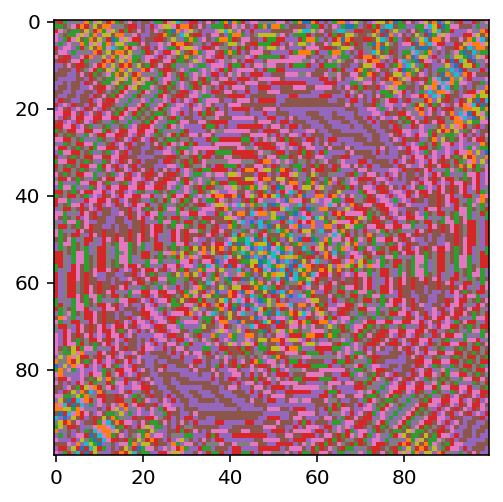

In [10]:
MINX = -10
MAXX = 10 # [m]
MINY = -10
MAXY = 10

Interval=50 #Delay between frames in milliseconds 

fig, ax = plt.subplots()

xs = np.linspace(MINX, MAXX, 100)
ys = np.linspace(MINY, MAXY, 100).reshape(-1, 1)
xs, ys = np.meshgrid(xs, ys)
r1 = np.sqrt((xs-2)**2 + (ys-2)**2) # Center in (2, 2)
r2 = np.sqrt((xs+2)**2 + (ys)**2) # Center in (-2, 0)

imgs = []
for frame_num in range(50):
    t=frame_num*Interval/1000 #time in [s]
    YS1 = y(r1, t, 0, omega1, v)
    YS2 = y(r2, t, 0, omega1, v)
    im = ax.imshow(YS1 + YS2, animated=True, cmap="spectral")
    imgs.append([im])

plt.close(anim._fig)
anim2 = ArtistAnimation(fig, imgs, interval=50, blit = True, repeat_delay=1000)
anim_writer = PillowWriter(fps=60)
anim2.save("bolge.gif", anim_writer)
HTML(anim2.to_jshtml())
